In [1]:
import opendatasets as od
import pandas

# od.download(
# 	"https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset")


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

count the number of images in the respective classes <br>
0 - Brain Tumout <br>
1 - Healthey

In [4]:
ROOT_DIR = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Training'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [5]:
number_of_images.items()

dict_items([('glioma', 1321), ('meningioma', 1339), ('notumor', 1595), ('pituitary', 1457)])

### We will split the data such that ###

* 70% for Train data
* 15% for Validation
* 15% for Testing


## Model Build ##

In [6]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

### CNN Model ###

In [7]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [9]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

#### Preparing our data using Data Generator ####

In [10]:
def preprocessingImages1(path):
    ## input :path
    ## output: Pre processed images
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [11]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Training'
train_data = preprocessingImages1(path)

Found 5712 images belonging to 4 classes.


In [12]:
def preprocessingImages2(path):
    ## input :path
    ## output: Pre processed images
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [13]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Testing'
test_data = preprocessingImages2(path)

Found 1311 images belonging to 4 classes.


In [14]:
path = 'C:/Users/ashen/Downloads/ML-projects/brain-tumor-mri-dataset/Testing'
val_data = preprocessingImages2(path)

Found 1311 images belonging to 4 classes.


#### Early stoping and model check point ####

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Early stopping

es = EarlyStopping(monitor ="val_accuracy", min_delta=0.01, patience=6, verbose=1, mode="auto")

## Model check point

mc= ModelCheckpoint(monitor ="val_accuracy", filepath='./bestmodel.h5', verbose=1, save_best_only=True, mode="auto")

cd = [es, mc]

#### Model Training ####

In [18]:
history = model.fit_generator(generator= train_data, 
                              steps_per_epoch=8, 
                              epochs=30, 
                              verbose=1, 
                              validation_data=val_data, 
                              validation_steps=16, 
                              callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -83462968.0000 - accuracy: 0.1914
Epoch 1: val_accuracy improved from -inf to 0.20898, saving model to .\bestmodel.h5
8/8 [==============================] - 11s 1s/step - loss: -83462968.0000 - accuracy: 0.1914 - val_loss: -143537456.0000 - val_accuracy: 0.2090
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: -225954880.0000 - accuracy: 0.2578
Epoch 2: val_accuracy improved from 0.20898 to 0.23633, saving model to .\bestmodel.h5
8/8 [==============================] - 11s 1s/step - loss: -225954880.0000 - accuracy: 0.2578 - val_loss: -389643776.0000 - val_accuracy: 0.2363
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -574960256.0000 - accuracy: 0.2422
Epoch 3: val_accuracy did not improve from 0.23633
8/8 [==============================] - 11s 1s/step - loss: -574960256.0000 - accuracy: 0.2422 - val_loss: -978834816.0000 - val_accuracy: 0.2129
Epoch 4/30
8/8 [==========================

#### Model Graphical Interpretation ####

In [20]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

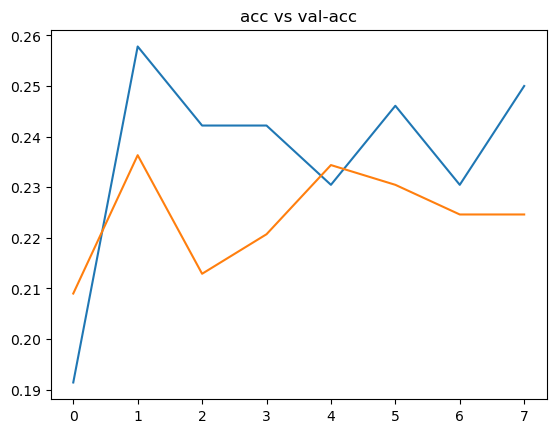

In [21]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title("acc vs val-acc")
plt.show()

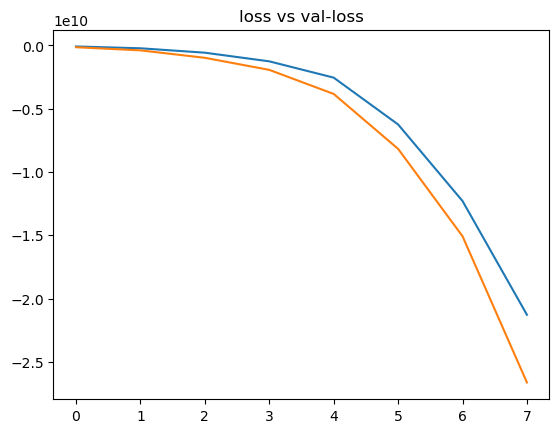

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title("loss vs val-loss")
plt.show()